In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2 import Mat
%matplotlib inline


Affine transformation

https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html

In [2]:
def getAffineTransform():
    img = cv2.imread('Images/stray.png')
    rows, cols, depth = img.shape

    p1, p2, p3 = [0, 0], [170, 0], [0, 100]
    new_p1, new_p2, new_p3 = [200, 0], [300, 50], [150, 50]

    pts1 = np.array([p1, p2, p3]).astype(np.float32)
    pts2 = np.array([new_p1, new_p2, new_p3]).astype(np.float32)

    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img, M, (cols, rows))

    cv2.imshow('img', img)
    cv2.waitKey(0)

    cv2.polylines(img, [pts1.astype(np.int32)], True, (0, 255, 0), 6)
    cv2.imshow('img', img)
    cv2.waitKey(0)

    cv2.polylines(img, [pts2.astype(np.int32)], True, (0, 0, 255), 6)
    cv2.imshow('img', img)
    cv2.waitKey(0)

    cv2.polylines(dst, [pts2.astype(np.int32)], True, (0, 0, 255), 6)
    cv2.imshow('dst', dst)
    cv2.waitKey(0)


In [3]:
getAffineTransform()


Perspective transformation

In [2]:
def perspective():
    img = cv2.imread('Images/numbers table.png')
    rows, cols, depth = img.shape
    cv2.imshow('img', img)

    g, h = 0, 0
    while True:
        M = np.array([[1, 0, 0],
                      [0, 1, 0],
                      [g, h, 1]]).astype(np.float32)
        dst = cv2.warpPerspective(img, M, (cols, rows))

        black = np.zeros(img.shape)
        cv2.putText(black, 'g:' + '{:.4f}'.format(g), (10, 60),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 200, 0), 1, 2)
        cv2.putText(black, 'h:' + '{:.4f}'.format(h), (10, 150),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 0, 200), 1, 2)

        cv2.imshow('vars', black)
        cv2.imshow('dst', dst)

        k = cv2.waitKey(0)
        if k == ord('+'):
            g += 0.0001
        elif k == ord('-'):
            g -= 0.0001
        elif k == ord('*'):
            h += 0.0001
        elif k == ord('/'):
            h -= 0.0001
        elif k == 27:
            break


In [3]:
perspective()


https://theailearner.com/2020/11/06/perspective-transformation/

In [4]:
def getPerspectiveTransform():
    img = cv2.imread('Images/sudoku.jpg')
    cv2.imshow('img', img)
    cv2.waitKey(0)

    rows, cols, depth = img.shape

    p1, p2, p3, p4 = [130, 165], [645, 143], [85, 645], [700, 625]
    new_p1, new_p2, new_p3, new_p4 = [0, 0], [
        cols-1, 0], [0, rows-1], [cols-1, rows-1]

    pts1 = np.array([p1, p2, p3, p4]).astype(np.float32)
    pts2 = np.array([new_p1, new_p2, new_p3, new_p4]).astype(np.float32)
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img, M, (cols, rows))

    for p in pts1:
        cv2.circle(img, p.astype(np.int32), 5, (0,  0, 255), -1)
        cv2.imshow('img', img)
        cv2.waitKey(0)

    cv2.imshow('dst', dst)
    cv2.waitKey(0)

In [5]:
getPerspectiveTransform()


Histogram

https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

In [4]:
def calcHist(img: Mat):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

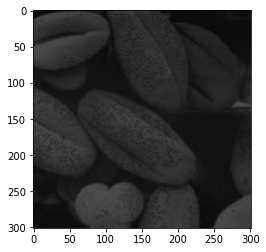

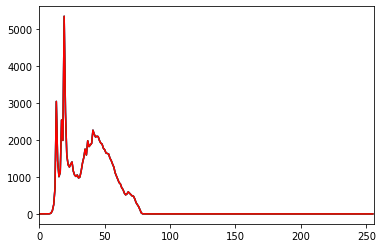

In [25]:
img = cv2.imread("Images/beans.png")
# img = cv2.imread("Images/bird.png") #try it
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
calcHist(img)


Histogram equalization

https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

In [28]:
def equalizeHist(img: Mat):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    calcHist(img)

    equalized_img = cv2.merge([cv2.equalizeHist(c) for c in cv2.split(img)])
    plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    plt.show()
    calcHist(equalized_img)


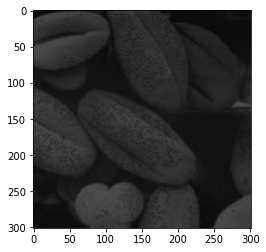

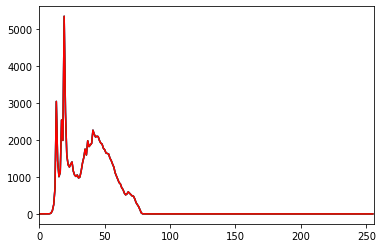

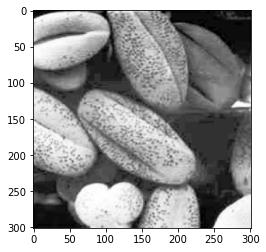

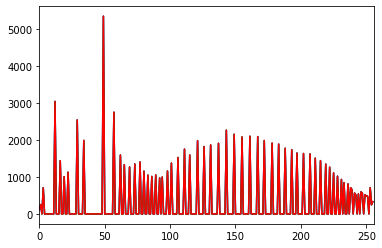

In [29]:
equalizeHist(img)


Filtering

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [6]:
def avgBlur(img: Mat, size: int):
    return cv2.blur(img, (size, size))


def gaussianBlur(img: Mat, size: int):
    return cv2.GaussianBlur(img, (size, size), sigmaX=0)


def medianBlur(img: Mat, size: int):
    return cv2.medianBlur(img, size)


In [10]:
def show_filtering_result(img: Mat, filter_func):
    n = 1
    while True:
        black = np.zeros((200, 200, 3))
        cv2.putText(black, f'size: {n}', (10, 60),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 200, 0), 1, 2)
        cv2.imshow('vars', black)

        blurImg = filter_func(img, n)
        cv2.imshow('blurred image', blurImg)

        k = cv2.waitKey(0)
        if k == ord('+'):
            n += 2
        elif k == ord('-'):
            n -= 2
        elif k == 27:
            break


In [ ]:
img = cv2.imread('Images/home.jpg')
show_filtering_result(img, avgBlur)
# show_filtering_result(img, gaussianBlur)
# show_filtering_result(img, medianBlur)
